# T20  CRICKET SCORE PREDICTOR

Twenty20 (T20) is a shortened game format of cricket. At the professional level, it was introduced by the England and Wales Cricket Board (ECB) in 2003 for the inter-county competition. In a Twenty20 game, the two teams have a single innings each, which is restricted to a maximum of 20 overs.

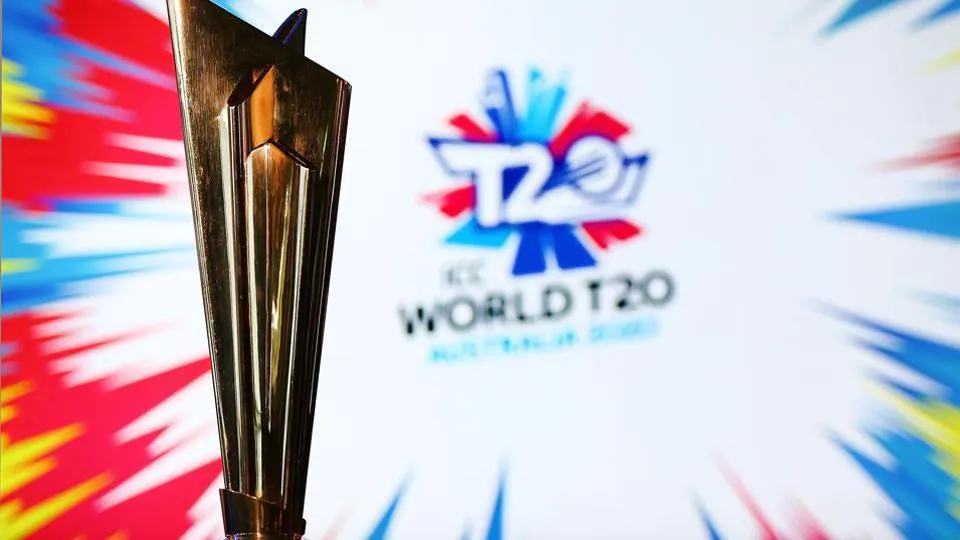

 #### Our model will predict the total score at the end of an innings by taking some factors in consideration.

## IMPORTING NECESSARY LIBRARIES

In [92]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## LOAD THE DATASET

In [93]:
df = pd.read_csv('C:/Users/SAVI/Downloads/mini project/t20i_info.csv')

In [3]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


## REQUIRED FEATURES
* batting team

* bowling team

* city

* current_score

* balls left

* wickets_left

* current_run_rate

* last five 

## MISSING VALUE 

In [5]:
df.isnull().sum()


match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

<AxesSubplot:>

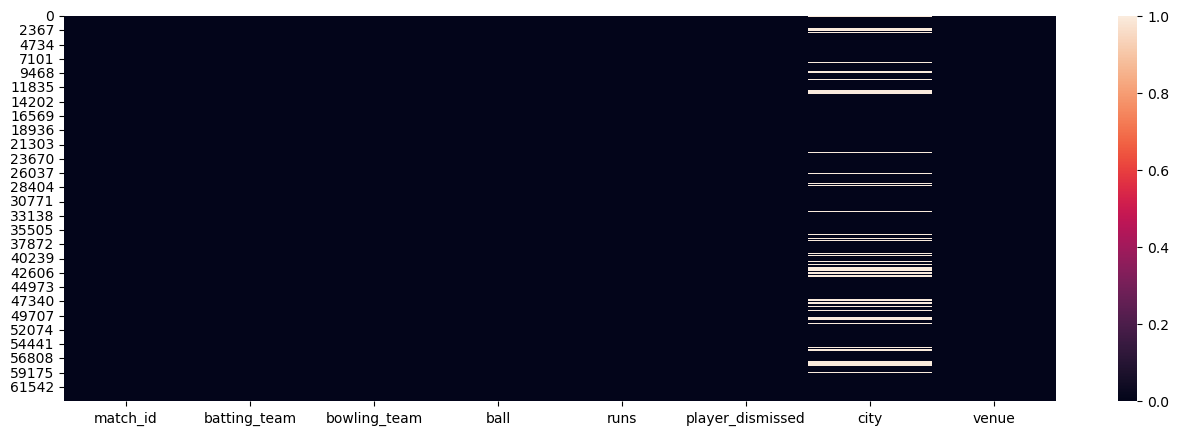

In [6]:
plt.figure(figsize=(16,5))
sns.heatmap(df.isnull())

In [7]:
df.dtypes

match_id              int64
batting_team         object
bowling_team         object
ball                float64
runs                  int64
player_dismissed     object
city                 object
venue                object
dtype: object

In [9]:
df.describe()

,match_id,ball,runs
count,63888.000000,63888.000000,63888.000000
mean,502.138445,9.733830,1.306489
std,280.384961,5.760606,1.584581
min,2.000000,0.100000,0.000000
25%,235.000000,4.600000,0.000000
50%,546.000000,9.600000,1.000000
75%,721.000000,14.600000,1.000000
max,964.000000,19.900000,7.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63888 entries, 0 to 63887
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          63888 non-null  int64  
 1   batting_team      63888 non-null  object 
 2   bowling_team      63888 non-null  object 
 3   ball              63888 non-null  float64
 4   runs              63888 non-null  int64  
 5   player_dismissed  63888 non-null  object 
 6   city              55340 non-null  object 
 7   venue             63888 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.9+ MB


In [89]:
df['city'].value_counts()

Colombo            4086
Mirpur             3420
Johannesburg       3331
Dubai              2969
Auckland           2532
Cape Town          2369
London             2106
Pallekele          2066
Barbados           2050
Sydney             1579
Melbourne          1574
Durban             1520
St Lucia           1487
Wellington         1350
Lauderhill         1238
Hamilton           1219
Centurion          1189
Manchester         1144
Abu Dhabi          1099
Mumbai              995
Nottingham          991
Southampton         987
Mount Maunganui     938
Chittagong          868
Kolkata             844
Lahore              748
Delhi               739
Nagpur              735
Chandigarh          627
Adelaide            623
Bangalore           620
St Kitts            618
Cardiff             615
Christchurch        614
Trinidad            611
Name: city, dtype: int64

In [11]:
df[df['city'].isnull()]['venue'].value_counts()

Dubai International Cricket Stadium        2969
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: venue, dtype: int64

<AxesSubplot:xlabel='venue'>

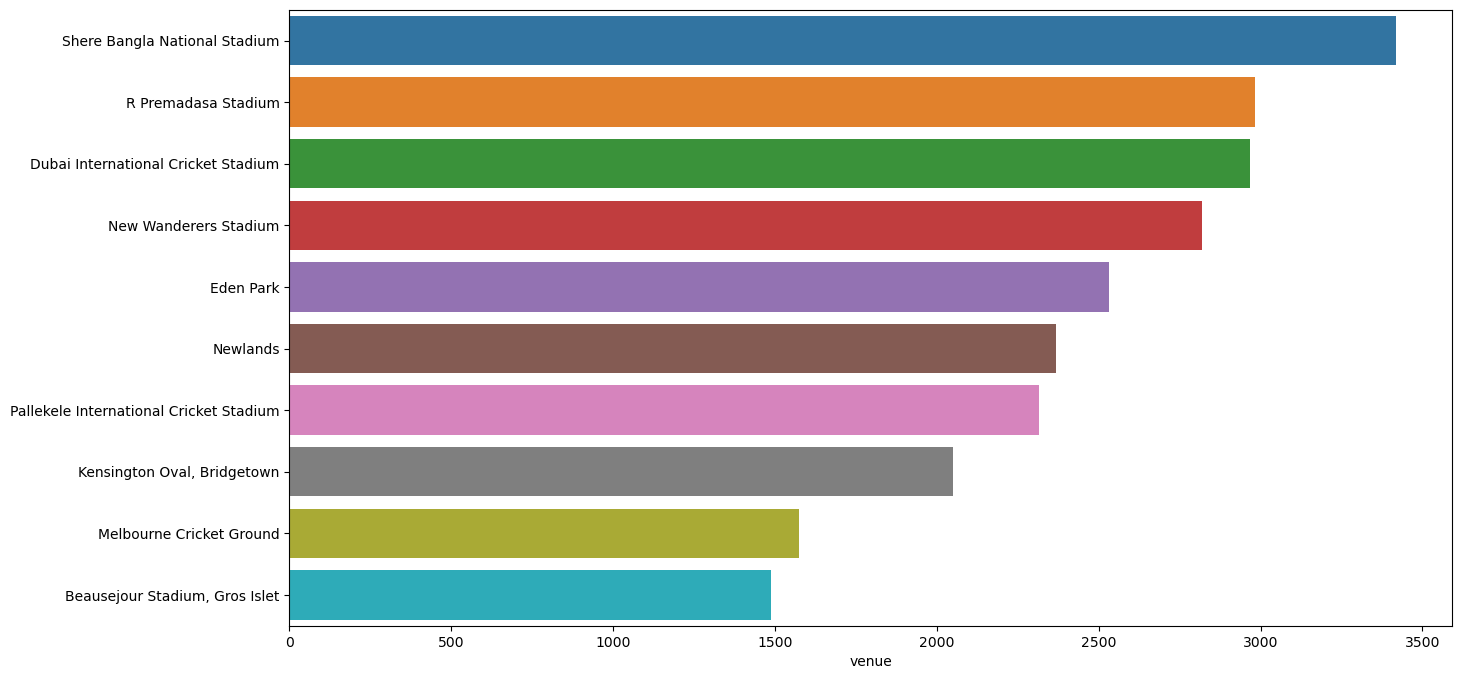

In [12]:
values = df.venue.value_counts().sort_values(ascending=False).head(10)
labels = values.index
plt.figure(figsize=(15,8))
sns.barplot(x=values, y=labels)

In [13]:
df[df['city'].isnull()]['venue'][0].split(' ')[0]

'Melbourne'

In [14]:
cities = np.where(df['city'].isnull(), df['venue'].str.split().apply(lambda x : x[0]), df['city'])

In [15]:
df['city'] = cities

In [19]:
df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [20]:
df.drop(columns=['venue'],inplace=True)

In [21]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo


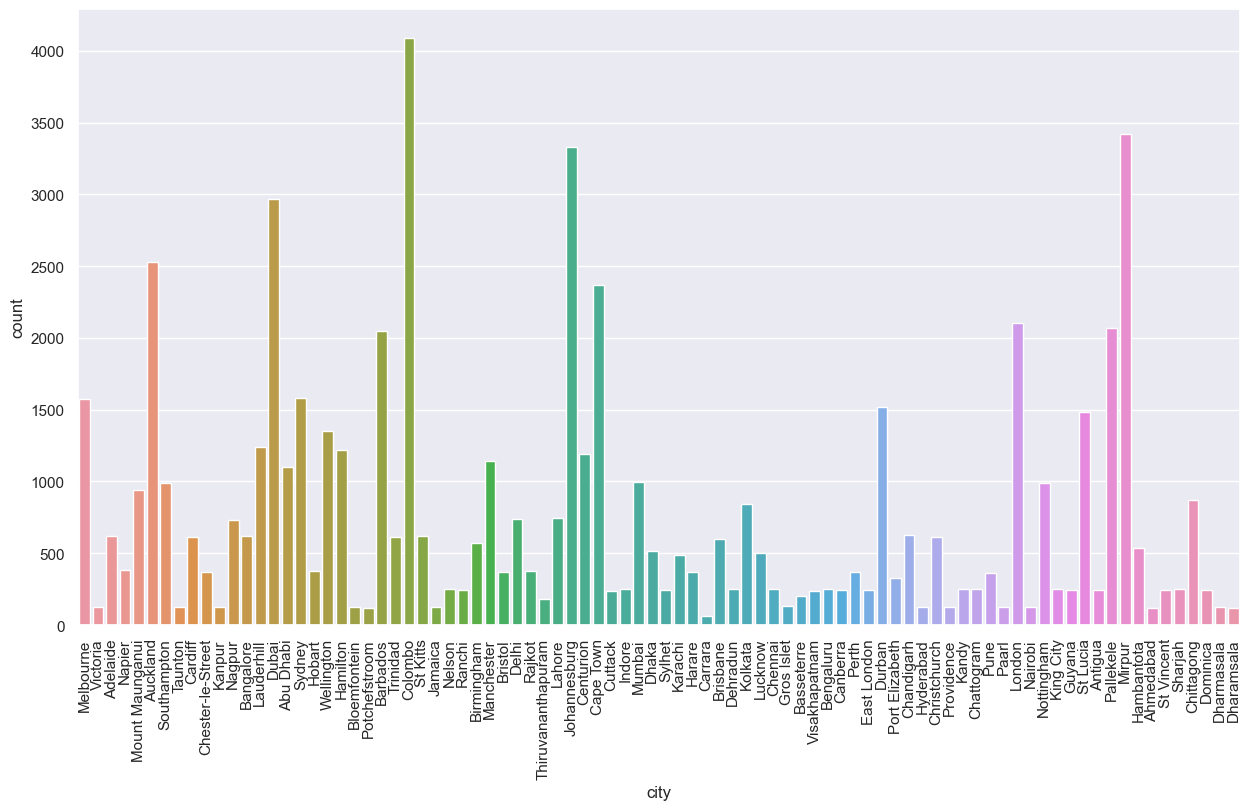

In [23]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.set()
sns.set(style="darkgrid")
ax = sns.countplot(x=df['city'], data=df)

In [25]:
df['batting_team'].unique()

array(['Australia', 'Bangladesh', 'New Zealand', 'South Africa',
       'England', 'West Indies', 'India', 'Pakistan', 'Afghanistan',
       'Sri Lanka'], dtype=object)

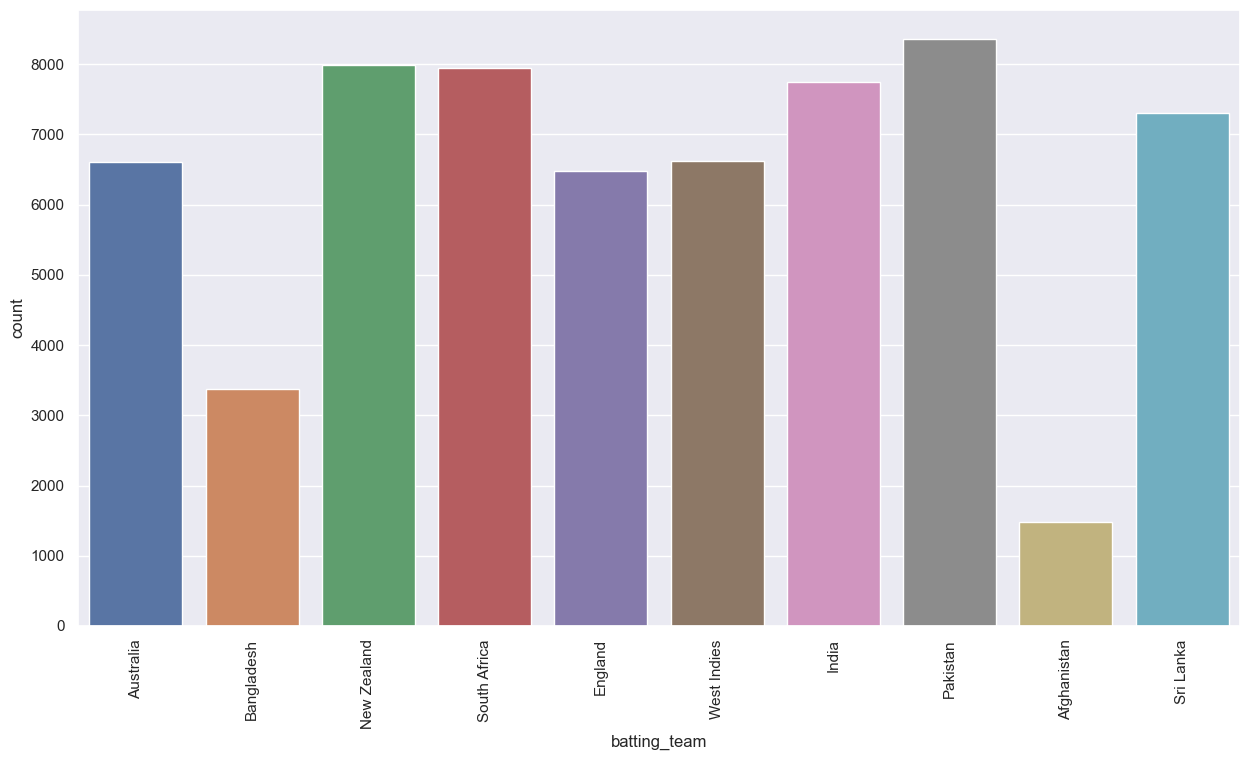

In [26]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.set()
sns.set(style="darkgrid")
ax = sns.countplot(x=df['batting_team'], data=df)

In [27]:
df['bowling_team'].unique()

array(['Sri Lanka', 'New Zealand', 'Bangladesh', 'England',
       'South Africa', 'India', 'Pakistan', 'West Indies', 'Australia',
       'Afghanistan'], dtype=object)

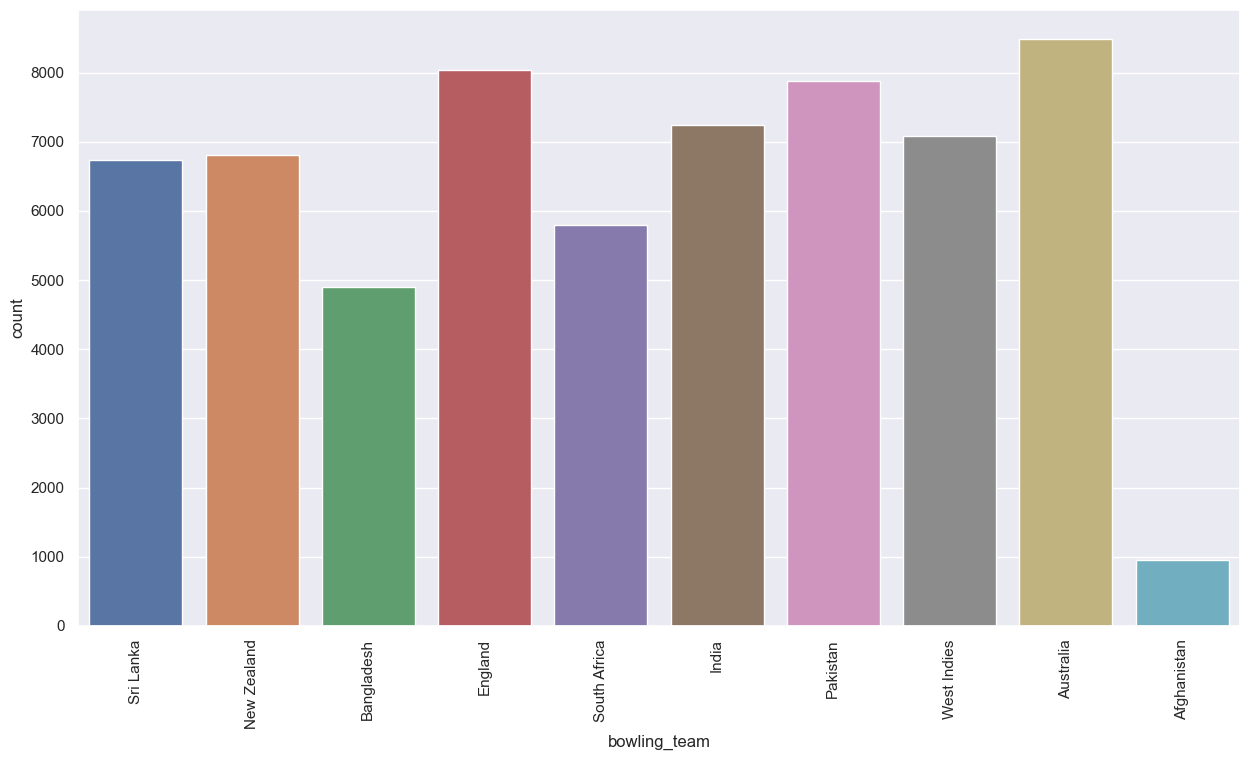

In [28]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.set()
sns.set(style="darkgrid")
ax = sns.countplot(x=df['bowling_team'], data=df)

In [29]:
eligible_cities = df['city'].value_counts()[df['city'].value_counts() > 600].index.tolist()

In [30]:
df = df[df['city'].isin(eligible_cities)]

In [31]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [32]:
df['current_score'] = df.groupby('match_id').cumsum()['runs']

In [33]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3
...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo,125
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo,125
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo,127


In [34]:
df['over'] = df['ball'].apply(lambda x : str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x : str(x).split(".")[1])
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5
...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6


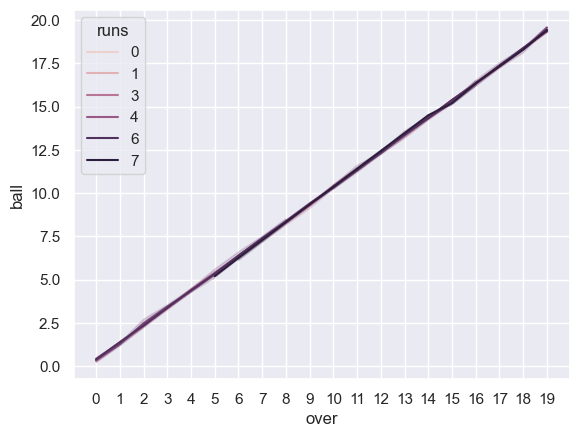

In [166]:
sns.lineplot(x = "over", y = "ball", hue="runs",data=df)
plt.show()

In [35]:
df['balls_bowled'] = (df['over'].astype('int')*6 + df['ball_no'].astype('int'))

In [36]:
df['balls_left'] = 120 - df['balls_bowled']

In [37]:
df['balls_left'] = df['balls_left'].apply(lambda x: 0 if x < 0 else x)

In [38]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [39]:
df['player_dismissed'].apply(lambda x: 1 if x != '0' else '0')

0        0
1        0
2        0
3        0
4        0
        ..
63883    0
63884    0
63885    1
63886    0
63887    0
Name: player_dismissed, Length: 50501, dtype: object

In [40]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x: 1 if x != '0' else 0)

In [41]:
df['player_dismissed'] = df['player_dismissed'].astype('int')

In [42]:
df['player_dismissed'] = df.groupby('match_id').cumsum()['player_dismissed']

In [43]:
df['wickets_left'] = 10 - df['player_dismissed']

In [44]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2
63884,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2
63885,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1
63886,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1


In [45]:
df['crr'] = (df['current_score']*6) / df['balls_bowled']

In [46]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256
63884,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932
63885,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521
63886,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000


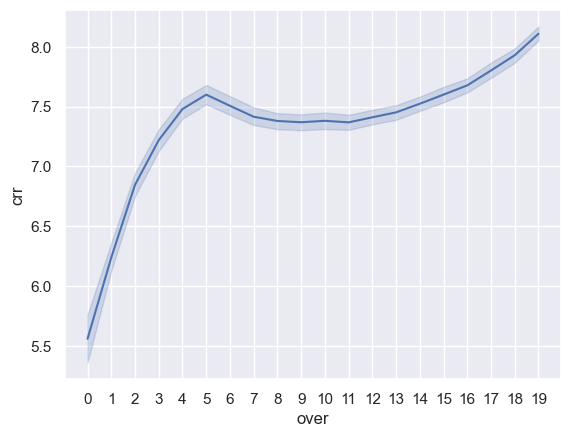

In [47]:
sns.lineplot(x="over",y="crr",data=df)
plt.show()

In [49]:
groups = df.groupby('match_id')

match_ids = df['match_id'].unique()
last_five = []
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())

In [50]:
df['last_five'] = last_five

In [51]:
final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')

In [52]:
final_df

,match_id,runs_x,batting_team,bowling_team,ball,runs_y,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,2,168,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,NaN
1,2,168,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,NaN
2,2,168,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,NaN
3,2,168,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,NaN
4,2,168,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50496,964,128,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,32.0
50497,964,128,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,32.0
50498,964,128,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,32.0
50499,964,128,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,33.0


In [82]:
final_df=final_df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]

In [83]:
final_df.dropna(inplace=True)

In [84]:
final_df.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_x           0
dtype: int64

In [85]:
final_df = final_df.sample(final_df.shape[0])

In [86]:
final_df.sample(3)


,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
27895,New Zealand,Sri Lanka,Lauderhill,100,15,4,5.714286,29.0,120
32264,West Indies,England,Pallekele,45,86,10,7.941176,43.0,179
42828,New Zealand,Pakistan,Dubai,127,10,4,6.927273,45.0,144


<AxesSubplot:xlabel='runs', ylabel='city'>

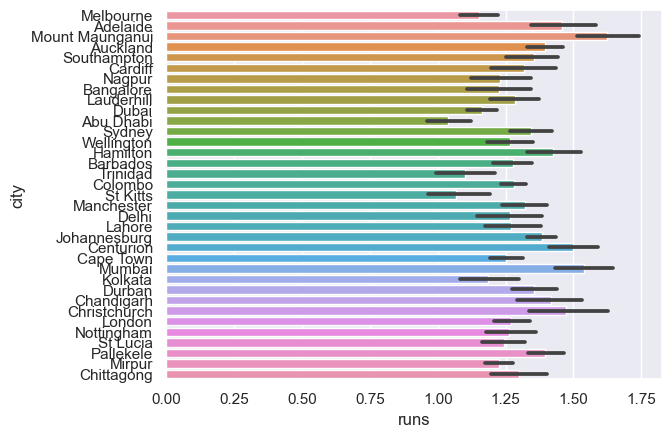

In [91]:
sns.barplot(data=df, x="runs", y="city")

In [58]:
X = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [59]:
X_train

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five
8757,Pakistan,New Zealand,Abu Dhabi,49,68,8,5.653846,39.0
15123,South Africa,India,Johannesburg,86,33,5,5.931034,34.0
1690,West Indies,Pakistan,Abu Dhabi,66,42,5,5.076923,35.0
1229,West Indies,India,Lauderhill,234,7,7,12.424779,44.0
455,New Zealand,Bangladesh,Mount Maunganui,102,39,7,7.555556,54.0
...,...,...,...,...,...,...,...,...
36104,Australia,Pakistan,Dubai,86,9,2,4.648649,22.0
28065,Pakistan,South Africa,Abu Dhabi,40,74,5,5.217391,22.0
23443,New Zealand,Sri Lanka,Colombo,119,35,8,8.400000,46.0
46681,South Africa,Sri Lanka,Cape Town,89,53,9,7.970149,38.0


In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [62]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [63]:
pipe= Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])

In [65]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9866447513609709
1.6760559161338886


In [68]:
pipe1= Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',RandomForestRegressor(n_estimators=100, max_depth=10))
])

In [69]:
pipe1.fit(X_train,y_train)
y_pred = pipe1.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8236534765902164
9.479555790039877


In [70]:
pipe2= Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',DecisionTreeRegressor())
])

In [71]:
pipe2.fit(X_train,y_train)
y_pred = pipe2.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9449130834734151
1.6261694386694387


In [72]:
from sklearn.svm import SVR

pipe3= Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',SVR(kernel = 'rbf'))
])

In [73]:
pipe3.fit(X_train,y_train)
y_pred = pipe3.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8179971757230319
8.129640599740476


In [46]:
#import pickle
#pickle.dump(pipe,open('pipe','wb'))

In [74]:
import pickle

In [75]:
filename='trained_model.sav'
pickle.dump(pipe,open(filename,'wb'))

In [76]:
#loaded model
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [77]:
import xgboost
xgboost.__version__

'1.6.2'